In [1]:
#!pip install cdflib
!pip install basemap

In [2]:
import numpy as np
import xarray as xr
#import cdflib
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
#grace = '/content/gdrive/MyDrive/msci_satellite_data/spd2015/GR_OPER_TEC1TMS_2F_20150317T000000_20150317T235959_0101.cdf'
path = '/content/gdrive/MyDrive/msci_satellite_data/cosmic/.ionPrf_postProc_2008_175/23sat2'
folder = os.fsencode(path)
filenames = []
for file in os.listdir(folder):
    filename = os.fsdecode(file)
    filenames.append(filename)
filenames.sort()

In [ ]:
plt.figure(figsize=[8,8])
plt.title('COSMIC-1 Electron density profiles on 17th March 2015')
plt.xlabel('Electron density / cm^-3')
plt.ylabel('Altitude / km')
for i in np.arange(0,271,40):
    ds = xr.open_dataset(path + '/' + filenames[i])
    plt.plot(ds.ELEC_dens, ds.MSL_alt, label=f'{ds.hour}:{ds.minute}')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=[8,8])
plt.title('COSMIC-1 TEC on 17th March 2015')
plt.xlabel('Total electron content / TECU')
plt.ylabel('Altitude / km')
for i in np.arange(0,271,40):
    ds = xr.open_dataset(path + '/' + filenames[i])
    plt.plot(ds.TEC_cal, ds.MSL_alt, label=f'{ds.hour}:{ds.minute}')
plt.legend()
plt.show()

In [ ]:
grace1 = cdflib.CDF(grace)
gt_info = grace1.cdf_info()
#gt_info

In [ ]:
fig2 = plt.figure(figsize=[16,5])
m2 = Basemap(projection='cyl', resolution='l', fix_aspect=False)
extent = [-180, 180, -90, 90] # Define lower left, upper right longitude and latitude respectively
m2.drawcoastlines(linewidth=0.25) # Draw coastlines and countries
m2.drawcountries(linewidth=0.35)
lon_step = 30
lat_step = 30
meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
m2.drawparallels(parallels, labels=[False, True, False, False])
m2.drawmeridians(meridians, labels=[False, False, False, True])
m2.plot(grace1.varget('Longitude'),grace1.varget('Latitude'))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GRACE satellite trajectory on 17th March 2015')
plt.show()
fig3 = plt.figure(figsize=[5,5])
ax3 = plt.axes(projection='3d')
ax3.plot(grace1.varget('LEO_Position')[:,0],grace1.varget('LEO_Position')[:,1],grace1.varget('LEO_Position')[:,2])
plt.show()

In [ ]:
vtec = grace1.varget('Absolute_VTEC')[0:53761:2000]
alti = grace1.varget('Radius')[0:53761:2000]
time = cdflib.cdfepoch.to_datetime(grace1.varget('Timestamp'))[0:53761:2000]
plt.figure(figsize=[20,8])
plt.title('GRACE TEC on 17th March 2015')
plt.xlabel('Absolute vertical total electron content')
plt.ylabel('Altitude / km')
for idx, i in enumerate(vtec):
    plt.plot(10*i,alti[idx]/1000,'o',label=f'{time[idx]}')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

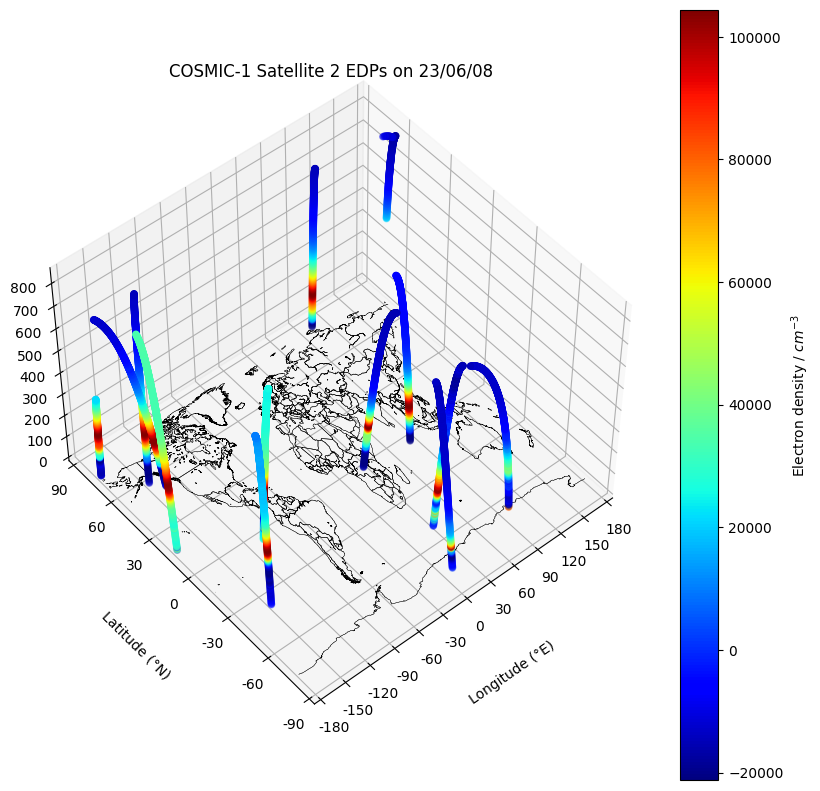

In [40]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection='3d')
# Define lower left, uperright lontitude and lattitude respectively
extent = [-180, 180, -90, 90]
# Create a basemap instance that draws the Earth layer
bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
             urcrnrlon=extent[1], urcrnrlat=extent[3],
             projection='cyl', resolution='l', fix_aspect=False, ax=ax)
# Add Basemap to the figure
ax.add_collection3d(bm.drawcoastlines(linewidth=0.25))
ax.add_collection3d(bm.drawcountries(linewidth=0.35))
ax.view_init(azim=230, elev=50)
ax.set_xlabel('Longitude (°E)', labelpad=20)
ax.set_ylabel('Latitude (°N)', labelpad=20)
ax.set_zlabel('Altitude (km)', labelpad=20)
ax.set_title('COSMIC-1 Satellite 2 EDPs on 23/06/08')
# Add meridian and parallel gridlines
lon_step = 30
lat_step = 30
meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
ax.set_yticks(parallels)
ax.set_yticklabels(parallels)
ax.set_xticks(meridians)
ax.set_xticklabels(meridians)
ax.set_zlim(0., 850.)
for i in np.arange(0,235,20):
    ds2 = xr.open_dataset(path + '/' + filenames[i])
    p = ax.scatter(ds2.GEO_lon, ds2.GEO_lat, ds2.MSL_alt, c=ds2.ELEC_dens, cmap='jet',label=f'{ds2.hour}:{ds2.minute}')
fig.colorbar(p, label='Electron density / $cm^{-3}$')
plt.show()

In [ ]:
def tec_alti(altitude, step):
    tec = []
    lon = []
    lat = []
    for i in np.arange(0,271,step):
        ds3 = xr.open_dataset(path + '/' + filenames[i])
        for idx, i in enumerate(ds3.MSL_alt):
            if i >= altitude:
              break
        tec.append(ds3.TEC_cal[idx])
        lon.append(ds3.GEO_lon[idx])
        lat.append(ds3.GEO_lat[idx])

    fig1 = plt.figure(figsize=[12,6])
    m = Basemap(projection='cyl', resolution='l', fix_aspect=False)
    extent = [-180, 180, -90, 90] # Define lower left, upper right longitude and latitude respectively
    m.drawcoastlines(linewidth=0.25) # Draw coastlines and countries
    m.drawcountries(linewidth=0.35)
    lon_step = 30
    lat_step = 30
    meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
    parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
    m.drawparallels(parallels, labels=[False, True, False, False])
    m.drawmeridians(meridians, labels=[False, False, False, True])
    p = m.scatter(lon, lat, c=tec, cmap='jet')
    fig1.colorbar(p, label='Total Electron Content / TECU')
    plt.xlabel('Longitude (°E)', labelpad=20)
    plt.ylabel('Latitude (°N)', labelpad=20)
    plt.title(f'COSMIC-1 TEC on 17th March 2015 at {altitude} km')
    plt.show()

In [ ]:
tec_alti(300,10)

In [4]:
def cmap(variable,hour,minute):
    '''Inputs: variable = 'TEC' or 'EDP' | hour = 4-19 | minute = 0-59.'''

    for k in filenames:
        ds1 = xr.open_dataset(path+'/'+k)
        if ds1.hour >= hour:
          if ds1.minute >= minute:
            break

    fig1 = plt.figure(figsize=[12,6])
    m = Basemap(projection='cyl', resolution='l', fix_aspect=False)
    extent = [-180, 180, -90, 90] # Define lower left, upper right longitude and latitude respectively
    m.drawcoastlines(linewidth=0.25) # Draw coastlines and countries
    m.drawcountries(linewidth=0.35)
    lon_step = 30
    lat_step = 30
    meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
    parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
    m.drawparallels(parallels, labels=[False, True, False, False])
    m.drawmeridians(meridians, labels=[False, False, False, True])
    if variable == 'TEC':
      p = m.imshow((ds1.MSL_alt,ds1.TEC_cal), extent=(-180,180,-90,90),cmap='jet')
      fig1.colorbar(p, label='Total Electron Content / 10^16 cm^-2')
    if variable == 'EDP':
      p = m.imshow((ds1.MSL_alt,ds1.ELEC_dens), extent=(-180,180,-90,90),cmap='jet')
      fig1.colorbar(p, label='Electron Density / el cm^-3')

    plt.xlabel('Longitude (°E)', labelpad=20)
    plt.ylabel('Latitude (°N)', labelpad=20)
    plt.title(f'COSMIC-1 {variable} at {ds1.hour}:{ds1.minute} on 23/06/08')
    plt.show()

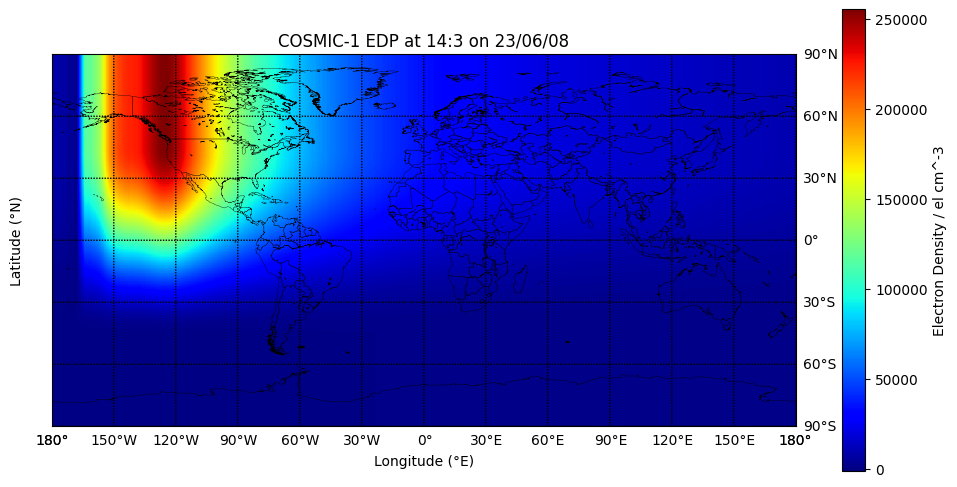

In [5]:
cmap('EDP',14,0)

In [ ]:
def slice3d(variable, altitude, step):
    '''Inputs: variable = 'TEC' or 'EDP' | altitude = 0-800 | step >= 1; smaller step value --> more data points.'''
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(projection='3d')
    # Define lower left, uperright lontitude and lattitude respectively
    extent = [-180, 180, -90, 90]
    # Create a basemap instance that draws the Earth layer
    bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
                urcrnrlon=extent[1], urcrnrlat=extent[3],
                projection='cyl', resolution='l', fix_aspect=False, ax=ax)
    # Add Basemap to the figure
    ax.add_collection3d(bm.drawcoastlines(linewidth=0.25))
    ax.add_collection3d(bm.drawcountries(linewidth=0.35))
    ax.view_init(azim=230, elev=50)
    ax.set_xlabel('Longitude (°E)', labelpad=20)
    ax.set_ylabel('Latitude (°N)', labelpad=20)
    ax.set_zlabel('Altitude (km)', labelpad=20)
    ax.set_title(f'COSMIC-1 {variable} on 17th March 2015')
    # Add meridian and parallel gridlines
    lon_step = 30
    lat_step = 30
    meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
    parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
    ax.set_yticks(parallels)
    ax.set_yticklabels(parallels)
    ax.set_xticks(meridians)
    ax.set_xticklabels(meridians)
    ax.set_zlim(0., 1000.)
    for i in np.arange(0,271,step):
        ds2 = xr.open_dataset(path + '/' + filenames[i])
        if variable == 'TEC':
          pt = ax.scatter(ds2.GEO_lon, ds2.GEO_lat, ds2.MSL_alt, c=ds2.TEC_cal, cmap='jet',label=f'{ds2.hour}:{ds2.minute}')
        if variable == 'EDP':
          pe = ax.scatter(ds2.GEO_lon, ds2.GEO_lat, ds2.MSL_alt, c=ds2.ELEC_dens, cmap='jet',label=f'{ds2.hour}:{ds2.minute}')
    if variable == 'TEC':
      fig.colorbar(pt, label='Total Electron Content / TECU (10^16 cm^-2)')
    if variable == 'EDP':
      fig.colorbar(pe, label='Electron Density / el cm^-3')
    plt.show()

    data = []
    lon = []
    lat = []
    for i in np.arange(0,271,step):
        ds3 = xr.open_dataset(path + '/' + filenames[i])
        for idx, i in enumerate(ds3.MSL_alt):
            if i >= altitude:
              break
        lon.append(ds3.GEO_lon[idx])
        lat.append(ds3.GEO_lat[idx])
        if variable == 'TEC':
          data.append(ds3.TEC_cal[idx])
        if variable == 'EDP':
          data.append(ds3.ELEC_dens[idx])

    fig3 = plt.figure(figsize=[12,6])
    m = Basemap(projection='cyl', resolution='l', fix_aspect=False)
    extent = [-180, 180, -90, 90] # Define lower left, upper right longitude and latitude respectively
    m.drawcoastlines(linewidth=0.25) # Draw coastlines and countries
    m.drawcountries(linewidth=0.35)
    lon_step = 30
    lat_step = 30
    meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
    parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
    m.drawparallels(parallels, labels=[False, True, False, False])
    m.drawmeridians(meridians, labels=[False, False, False, True])
    if variable == 'TEC':
      p = m.scatter(lon, lat, c=data, cmap='jet')
      fig3.colorbar(p, label='Total Electron Content / 10^16 cm^-2')
    if variable == 'EDP':
      p = m.scatter(lon, lat, c=data, cmap='jet')
      fig3.colorbar(p, label='Electron Density / el cm^-3')
    plt.xlabel('Longitude (°E)', labelpad=20)
    plt.ylabel('Latitude (°N)', labelpad=20)
    plt.title(f'COSMIC-1 {variable} on 17/03/15 at {altitude} km')
    plt.show()

In [ ]:
slice3d('EDP',300,10)

In [ ]:
import matplotlib.axes as ma
def discrete(variable,altitude):

    data = []
    lon = []
    lat = []
    for i in np.arange(0,271,12):
        ds3 = xr.open_dataset(path + '/' + filenames[i])
        for idx, i in enumerate(ds3.MSL_alt):
            if i >= altitude:
              break
        lon.append(ds3.GEO_lon.values[idx])
        lat.append(ds3.GEO_lat.values[idx])
        if variable == 'TEC':
          data.append(ds3.TEC_cal.values[idx])
        if variable == 'EDP':
          data.append(ds3.ELEC_dens.values[idx])
    return data, lon, lat

In [ ]:
wan = discrete('TEC',350)

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'x' : wan[1],
    'y' : wan[2],
    'z' : wan[0]
})
A = pd.pivot_table(df, values="z", index=["x"], columns=["y"])

X_unique = np.sort(df.x.unique())
Y_unique = np.sort(df.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
Z = A.T.values

In [ ]:
#from IPython.display import set_matplotlib_formats

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Initialize plot objects
#rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour plot
cp = ax.contour(X, Y, Z)
plt.show()